In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/applegoogleamazonibmteslasp500-2012-2020/stock.csv


In [ ]:
# This notebook will help you understand stock price trends in depth.
# Some indicators such as moving averages for 50,100 and 200 days
# Bollinger bands (20 day mean and 20 days std deviations)
![image.png](attachment:image.png)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Importing our Dataset
stocks_df = pd.read_csv('../input/applegoogleamazonibmteslasp500-2012-2020/stock.csv')
stocks_df

,Date,AAPL,AMZN,IBM,TSLA,GOOG,sp500
0,12-01-2012,60.198570,175.929993,180.550003,28.250000,313.644379,1295.500000
1,13-01-2012,59.972858,178.419998,179.160004,22.790001,311.328064,1289.089966
2,17-01-2012,60.671429,181.660004,180.000000,26.600000,313.116364,1293.670044
3,18-01-2012,61.301430,189.440002,181.070007,26.809999,315.273285,1308.040039
4,19-01-2012,61.107143,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...
2154,05-08-2020,440.250000,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,06-08-2020,455.609985,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,07-08-2020,444.450012,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,10-08-2020,450.910004,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [4]:
stocks_df.columns

Index(['Date', 'AAPL', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [6]:
# A custom function for making interactive plots
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) 

  fig.show()

In [11]:
def interactive_plot(df, title):
    for i in df.columns[1:]:
        fig = px.line(df, x='Date', y=i, title=f'{title} - {i}')
        fig.show()

interactive_plot(stocks_df, 'Stock_Prices')

In [21]:
# This function will help us visulaize daily changes in the stock prices by subtracting the stock price from its previous day price
# and dividing it by the prev value to get the net change. Multiply by 100.
def daily_return(df):
  df_daily_return = df.copy()

  
  for i in df.columns[1:]:
    
    
    for j in range(1, len(df)):

      
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [22]:
stocks_daily_return = daily_return(stocks_df)

In [23]:
stocks_daily_return

,Date,AAPL,AMZN,IBM,TSLA,GOOG,sp500,ma50,ma100,ma200,ma300,ma20,20sd,upper_band,lower_band
0,12-01-2012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,13-01-2012,-0.374946,1.415339,-0.769869,-19.327430,-0.738516,-0.494792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17-01-2012,1.164812,1.815943,0.468852,16.717854,0.574410,0.355295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-01-2012,1.038382,4.282725,0.594448,0.789470,0.688856,1.110793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19-01-2012,-0.316937,2.644634,-0.303752,-0.186494,1.052283,0.493866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,05-08-2020,0.362467,2.109065,-0.309917,-0.133153,0.589774,0.642974,0.213234,0.209674,0.055965,0.060256,0.244327,6.522609,0.407295,0.072436
2155,06-08-2020,3.488923,0.623082,0.534082,0.307062,1.797626,0.642770,0.198234,0.326713,0.056076,0.061939,0.304390,3.823621,0.401304,0.201828
2156,07-08-2020,-2.449458,-1.784187,-0.919762,-2.475194,-0.373974,0.063303,0.203227,0.277990,0.058148,0.066201,0.255940,6.132510,0.423287,0.078486
2157,10-08-2020,1.453480,-0.609323,1.720552,-2.350092,0.107728,0.274222,0.199415,0.324523,0.058222,0.068012,0.315192,-1.379733,0.264182,0.369470


In [24]:
# Zoom in to see more clearly. In fact to some extent you can also understand how volatile a given stock is by looking
#  at its deviation from the mean
interactive_plot(stocks_daily_return, 'Daily Returns on Stocks')

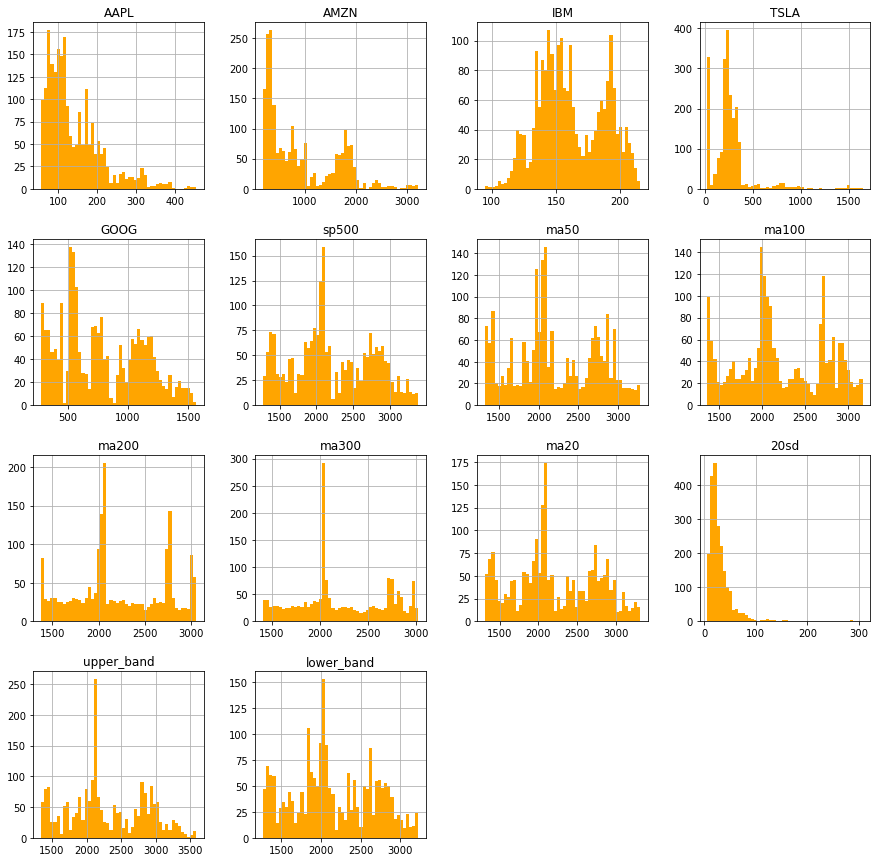

In [25]:
# Distribution of stock prices
stocks_df.hist(figsize=(15, 15), bins = 50,color='orange');

In [26]:
stocks_df.skew()

AAPL          1.406613
AMZN          0.898941
IBM           0.151803
TSLA          3.171867
GOOG          0.331236
sp500         0.137733
ma50          0.089072
ma100         0.064656
ma200         0.086520
ma300         0.107733
ma20          0.118325
20sd          4.759449
upper_band    0.180420
lower_band    0.110312
dtype: float64

In [27]:
stocks_daily_return.skew()

AAPL         -0.097803
AMZN          0.620385
IBM          -0.464177
TSLA          0.488264
GOOG          0.635137
sp500        -0.651695
ma50         -1.228363
ma100        -0.702680
ma200        -0.835012
ma300        -0.358836
ma20         -2.394505
20sd          2.401936
upper_band   -1.956012
lower_band   -1.870966
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x783ea9917390>,
      dtype=object)

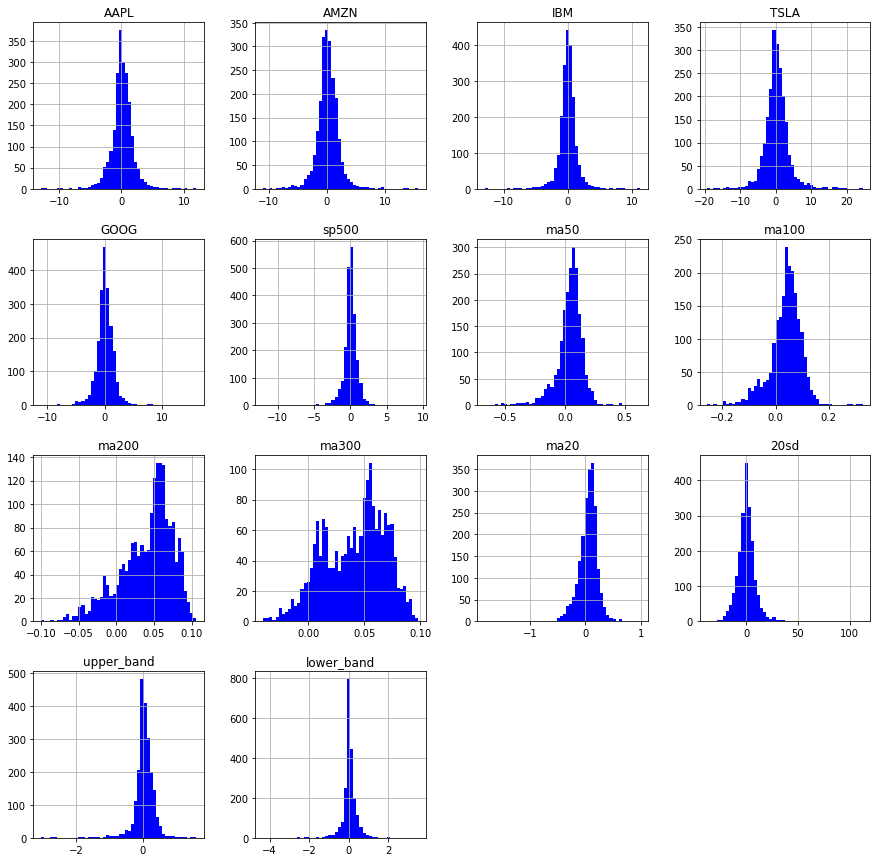

In [28]:
# this is the volalitity of every stock 
stocks_daily_return.hist(figsize=(15,15),color='b',bins=50)

In [29]:
stock = stocks_daily_return.copy()


stock = stock.drop(columns = ['Date'])

data = []


for i in stock.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324]),
 array([0.        ,        nan,        nan, ..., 0.20322682, 0.19941487,
        0.17497169]),
 array([0.        ,        nan,        nan, ..., 0.27798997, 0.32452347,
        0.31067761]),
 array([0.        ,        nan,        nan, ..., 0.05814803, 0.05822218,
        0.05286724]),
 array([0.        ,        nan,        nan, ..., 0.06620052, 0.06801153,
        0.05852107]),
 array([

In [30]:
# visualzing the volatility of all stocks in a single graph
fig = ff.create_distplot(data, stock.columns)
fig.show()

ValueError: array must not contain infs or NaNs

In [34]:
# By what factor did the value of the stock grown since 2012
def normalize(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


In [20]:
interactive_plot(normalize(stocks_df), 'X Returns')

NameError: name 'normalize' is not defined

# As you can see 1 dollar invested in Apple,Google,IBM,Amazon,Tesla in 2012 would yield 7,4.8,0.7,17.8,50 dollars in 2020. Cool right!

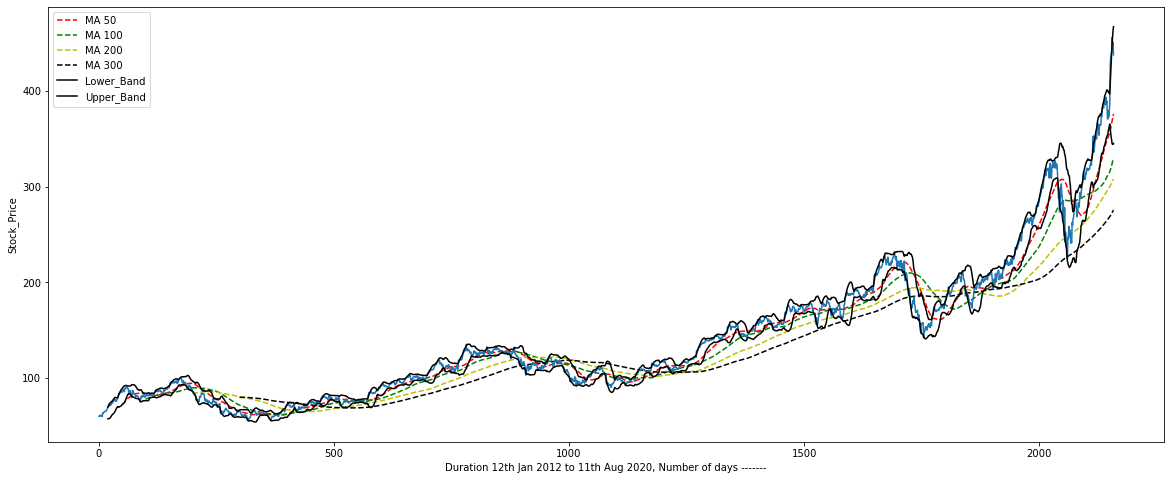

In [12]:
# A custom plot to visualise all the different indicators in one graph, you could use many more indicators but that would be tough to interpret.
plt.figure(figsize=(20,8))
stocks_df['ma50'] = stocks_df['AAPL'].rolling(window=50).mean()
stocks_df['ma100'] = stocks_df['AAPL'].rolling(window=100).mean()
stocks_df['ma200'] = stocks_df['AAPL'].rolling(window=200).mean()
stocks_df['ma300'] = stocks_df['AAPL'].rolling(window=300).mean()

plt.plot(stocks_df['ma50'],label='MA 50', color='r',linestyle='--')
plt.plot(stocks_df['ma100'],label='MA 100', color='g',linestyle='--')
plt.plot(stocks_df['ma200'],label='MA 200', color='y',linestyle='--')
plt.plot(stocks_df['ma300'],label='MA 300', color='black',linestyle='--')
plt.plot(stocks_df['AAPL'])
stocks_df['ma20'] = stocks_df['AAPL'].rolling(window=20).mean()
stocks_df['20sd'] = stocks_df['AAPL'].rolling(window=20).std()
stocks_df['upper_band'] = stocks_df['ma20'] + (stocks_df['20sd']*2)
stocks_df['lower_band'] = stocks_df['ma20'] - (stocks_df['20sd']*2)
plt.plot(stocks_df['lower_band'],label='Lower_Band',color='black',linestyle='-')
plt.plot(stocks_df['upper_band'],label='Upper_Band',color='black',linestyle='-')
plt.legend()
plt.xlabel('Duration 12th Jan 2012 to 11th Aug 2020, Number of days -------')
plt.ylabel('Stock_Price')
plt.show()

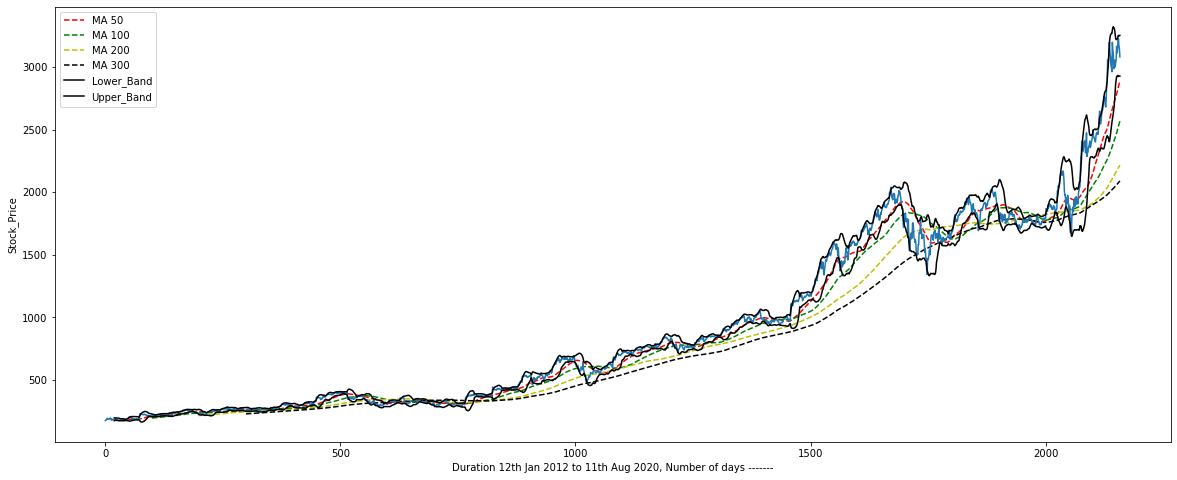

In [13]:
plt.figure(figsize=(20,8))
stocks_df['ma50'] = stocks_df['AMZN'].rolling(window=50).mean()
stocks_df['ma100'] = stocks_df['AMZN'].rolling(window=100).mean()
stocks_df['ma200'] = stocks_df['AMZN'].rolling(window=200).mean()
stocks_df['ma300'] = stocks_df['AMZN'].rolling(window=300).mean()

plt.plot(stocks_df['ma50'],label='MA 50', color='r',linestyle='--')
plt.plot(stocks_df['ma100'],label='MA 100', color='g',linestyle='--')
plt.plot(stocks_df['ma200'],label='MA 200', color='y',linestyle='--')
plt.plot(stocks_df['ma300'],label='MA 300', color='black',linestyle='--')
plt.plot(stocks_df['AMZN'])
stocks_df['ma20'] = stocks_df['AMZN'].rolling(window=20).mean()
stocks_df['20sd'] = stocks_df['AMZN'].rolling(window=20).std()
stocks_df['upper_band'] = stocks_df['ma20'] + (stocks_df['20sd']*2)
stocks_df['lower_band'] = stocks_df['ma20'] - (stocks_df['20sd']*2)
plt.plot(stocks_df['lower_band'],label='Lower_Band',color='black',linestyle='-')
plt.plot(stocks_df['upper_band'],label='Upper_Band',color='black',linestyle='-')
plt.legend()
plt.xlabel('Duration 12th Jan 2012 to 11th Aug 2020, Number of days -------')
plt.ylabel('Stock_Price')
plt.show()

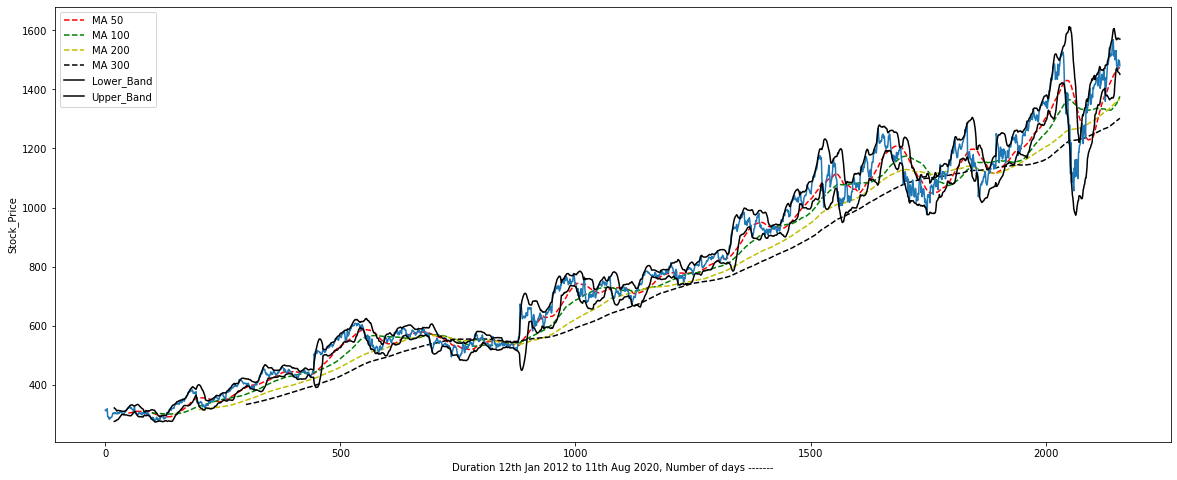

In [14]:
plt.figure(figsize=(20,8))
stocks_df['ma50'] = stocks_df['GOOG'].rolling(window=50).mean()
stocks_df['ma100'] = stocks_df['GOOG'].rolling(window=100).mean()
stocks_df['ma200'] = stocks_df['GOOG'].rolling(window=200).mean()
stocks_df['ma300'] = stocks_df['GOOG'].rolling(window=300).mean()

plt.plot(stocks_df['ma50'],label='MA 50', color='r',linestyle='--')
plt.plot(stocks_df['ma100'],label='MA 100', color='g',linestyle='--')
plt.plot(stocks_df['ma200'],label='MA 200', color='y',linestyle='--')
plt.plot(stocks_df['ma300'],label='MA 300', color='black',linestyle='--')
plt.plot(stocks_df['GOOG'])
stocks_df['ma20'] = stocks_df['GOOG'].rolling(window=20).mean()
stocks_df['20sd'] = stocks_df['GOOG'].rolling(window=20).std()
stocks_df['upper_band'] = stocks_df['ma20'] + (stocks_df['20sd']*2)
stocks_df['lower_band'] = stocks_df['ma20'] - (stocks_df['20sd']*2)
plt.plot(stocks_df['lower_band'],label='Lower_Band',color='black',linestyle='-')
plt.plot(stocks_df['upper_band'],label='Upper_Band',color='black',linestyle='-')
plt.legend()
plt.xlabel('Duration 12th Jan 2012 to 11th Aug 2020, Number of days -------')
plt.ylabel('Stock_Price')
plt.show()


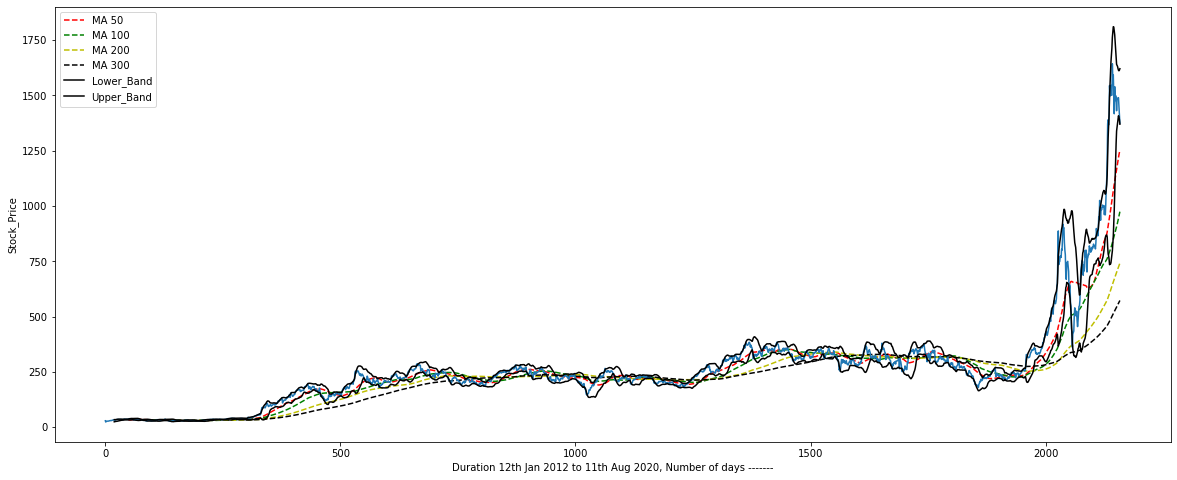

In [15]:
plt.figure(figsize=(20,8))
stocks_df['ma50'] = stocks_df['TSLA'].rolling(window=50).mean()
stocks_df['ma100'] = stocks_df['TSLA'].rolling(window=100).mean()
stocks_df['ma200'] = stocks_df['TSLA'].rolling(window=200).mean()
stocks_df['ma300'] = stocks_df['TSLA'].rolling(window=300).mean()

plt.plot(stocks_df['ma50'],label='MA 50', color='r',linestyle='--')
plt.plot(stocks_df['ma100'],label='MA 100', color='g',linestyle='--')
plt.plot(stocks_df['ma200'],label='MA 200', color='y',linestyle='--')
plt.plot(stocks_df['ma300'],label='MA 300', color='black',linestyle='--')
plt.plot(stocks_df['TSLA'])
stocks_df['ma20'] = stocks_df['TSLA'].rolling(window=20).mean()
stocks_df['20sd'] = stocks_df['TSLA'].rolling(window=20).std()
stocks_df['upper_band'] = stocks_df['ma20'] + (stocks_df['20sd']*2)
stocks_df['lower_band'] = stocks_df['ma20'] - (stocks_df['20sd']*2)
plt.plot(stocks_df['lower_band'],label='Lower_Band',color='black',linestyle='-')
plt.plot(stocks_df['upper_band'],label='Upper_Band',color='black',linestyle='-')
plt.legend()
plt.xlabel('Duration 12th Jan 2012 to 11th Aug 2020, Number of days -------')
plt.ylabel('Stock_Price')
plt.show()


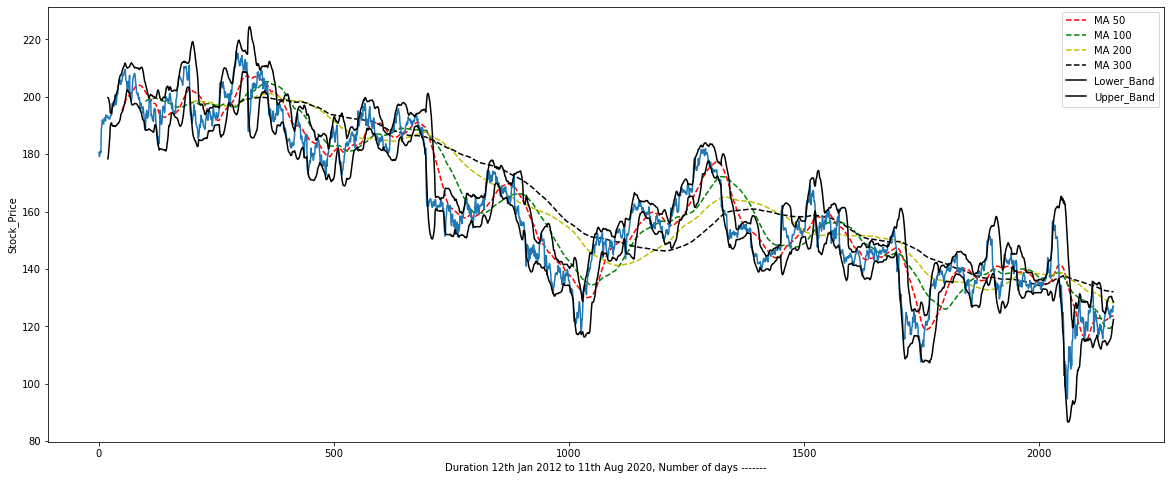

In [16]:
plt.figure(figsize=(20,8))
stocks_df['ma50'] = stocks_df['IBM'].rolling(window=50).mean()
stocks_df['ma100'] = stocks_df['IBM'].rolling(window=100).mean()
stocks_df['ma200'] = stocks_df['IBM'].rolling(window=200).mean()
stocks_df['ma300'] = stocks_df['IBM'].rolling(window=300).mean()

plt.plot(stocks_df['ma50'],label='MA 50', color='r',linestyle='--')
plt.plot(stocks_df['ma100'],label='MA 100', color='g',linestyle='--')
plt.plot(stocks_df['ma200'],label='MA 200', color='y',linestyle='--')
plt.plot(stocks_df['ma300'],label='MA 300', color='black',linestyle='--')
plt.plot(stocks_df['IBM'])
stocks_df['ma20'] = stocks_df['IBM'].rolling(window=20).mean()
stocks_df['20sd'] = stocks_df['IBM'].rolling(window=20).std()
stocks_df['upper_band'] = stocks_df['ma20'] + (stocks_df['20sd']*2)
stocks_df['lower_band'] = stocks_df['ma20'] - (stocks_df['20sd']*2)
plt.plot(stocks_df['lower_band'],label='Lower_Band',color='black',linestyle='-')
plt.plot(stocks_df['upper_band'],label='Upper_Band',color='black',linestyle='-')
plt.legend()
plt.xlabel('Duration 12th Jan 2012 to 11th Aug 2020, Number of days -------')
plt.ylabel('Stock_Price')
plt.show()


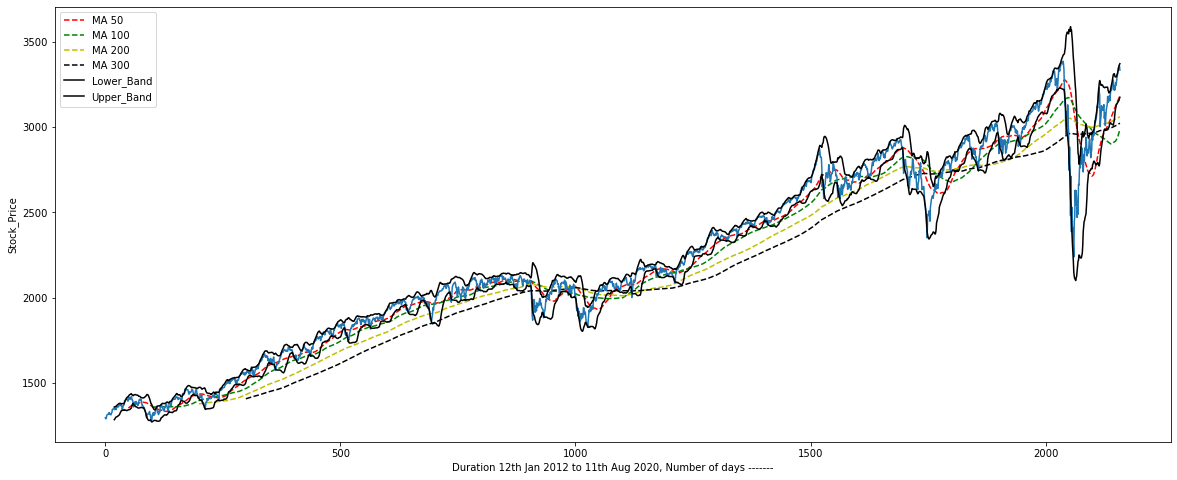

In [17]:
plt.figure(figsize=(20,8))
stocks_df['ma50'] = stocks_df['sp500'].rolling(window=50).mean()
stocks_df['ma100'] = stocks_df['sp500'].rolling(window=100).mean()
stocks_df['ma200'] = stocks_df['sp500'].rolling(window=200).mean()
stocks_df['ma300'] = stocks_df['sp500'].rolling(window=300).mean()

plt.plot(stocks_df['ma50'],label='MA 50', color='r',linestyle='--')
plt.plot(stocks_df['ma100'],label='MA 100', color='g',linestyle='--')
plt.plot(stocks_df['ma200'],label='MA 200', color='y',linestyle='--')
plt.plot(stocks_df['ma300'],label='MA 300', color='black',linestyle='--')
plt.plot(stocks_df['sp500'])
stocks_df['ma20'] = stocks_df['sp500'].rolling(window=20).mean()
stocks_df['20sd'] = stocks_df['sp500'].rolling(window=20).std()
stocks_df['upper_band'] = stocks_df['ma20'] + (stocks_df['20sd']*2)
stocks_df['lower_band'] = stocks_df['ma20'] - (stocks_df['20sd']*2)
plt.plot(stocks_df['lower_band'],label='Lower_Band',color='black',linestyle='-')
plt.plot(stocks_df['upper_band'],label='Upper_Band',color='black',linestyle='-')
plt.legend()
plt.xlabel('Duration 12th Jan 2012 to 11th Aug 2020, Number of days -------')
plt.ylabel('Stock_Price')
plt.show()


# Are stock prices of different companies correlated with each other?

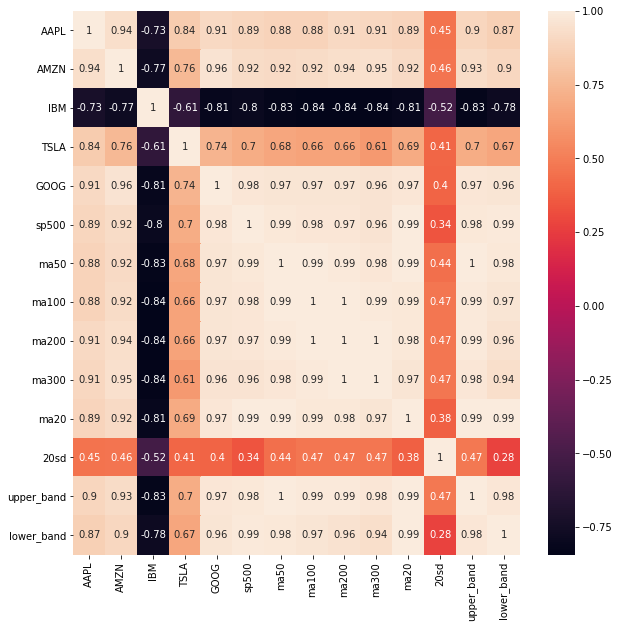

In [18]:
plt.figure(figsize=(10, 10))
matrix=stocks_df.corr()
sns.heatmap(matrix,annot=True)



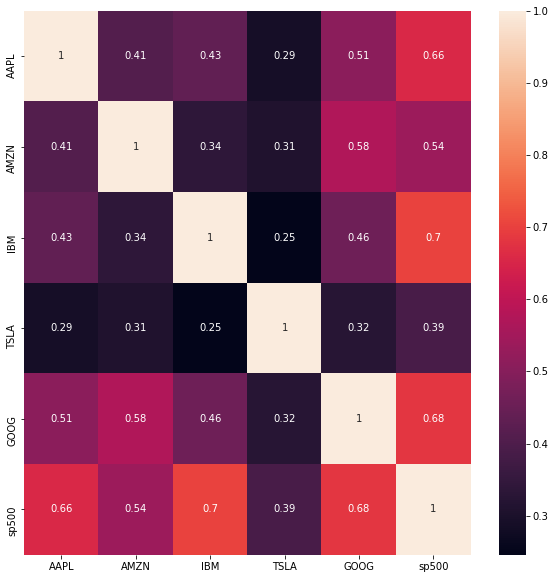

In [19]:
plt.figure(figsize=(10, 10))
matrix2=stocks_daily_return.corr()
sns.heatmap(matrix2,annot=True)


#  In the next notebook the focus will be more on ratios such as P/E, EBIT,EBITA,EBITDA,CASHFLOWS,DEBT,REVENUE,ETC.
# IF YOU HAVE ANY SUGGESTIONS PLEASE FEEL FREE TO SHARE. If you know any related datsets or familiar datasets please share.

# If you like this notebook please do share and upvote. More on financial analysis coming soon.
